## 异常检测——基于相似度的方法

 数据通常嵌入在大量的噪声中，而我们所说的“异常值”通常指具有特定业务意义的那一类特殊的异常值。
 噪声可以视作特性较弱的异常值，没有被分析的价值。噪声和异常之间、正常数据和噪声之间的边界都是模糊的。异常值通常具有更高的离群程度分数值，同时也更具有可解释性。
  在普通的数据处理中，我们常常需要保留正常数据，而对噪声和异常值的特性则基本忽略。但在异常检测中，我们弱化了“噪声”和“正常数据”之间的区别，专注于那些具有有价值特性的异常值。在基于相似度的方法中，主要思想是异常点的表示与正常点不同.

## 基于距离的度量
基于距离的方法是一种常见的适用于各种数据域的异常检测算法，它基于最近邻距离来定义异常值。 此类方法不仅适用于多维数值数据，在其他许多领域，例如分类数据，文本数据，时间序列数据和序列数据等方面也有广泛的应用。   基于距离的异常检测有这样一个前提假设，即异常点的 $k$ 近邻距离要远大于正常点。解决问题的最简单方法是使用嵌套循环。 第一层循环遍历每个数据，第二层循环进行异常判断，需要计算当前点与其他点的距离，一旦已识别出多于 $k$ 个数据点与当前点的距离在 $D$ 之内，则将该点自动标记为非异常值。 这样计算的时间复杂度为$O(N^{2})$，当数据量比较大时，这样计算是及不划算的。 因此，需要修剪方法以加快距离计算。

#### (1)基于单元的方法
在基于单元格的技术中，数据空间被划分为单元格，单元格的宽度是阈值D和数据维数的函数。具体地说，每个维度被划分成宽度最多为 $\frac{D}{{2 \cdot \sqrt d }}$ 单元格。在给定的单元以及相邻的单元中存在的数据点满足某些特性，这些特性可以让数据被更有效的处理。

#### （2）基于索引的方法
对于一个给定数据集，基于索引的方法利用多维索引结构(如 $\mathrm{R}$ 树、$k-d$ 树)来搜索每个数据对象 $A$ 在半径 $D$ 范围 内的相邻点。设 $M$ 是一个异常值在其 $D$ -邻域内允许含有对象的最多个数，若发现某个数据对象 $A$ 的 $D$ -邻域内出现 $M+1$ 甚至更多个相邻点， 则判定对象 $A$ 不是异常值。该算法时间复杂度在最坏情况下为 $O\left(k N^{2}\right),$ 其中 $k$ 是数据集维数， $N$ 是数据集包含对象的个数。该算法在数据集的维数增加时具有较好的扩展性，但是时间复杂度的估算仅考虑了搜索时间，而构造索引的任务本身就需要密集复杂的计算量。

## 基于密度的度量

基于密度的算法主要有局部离群因子(LocalOutlierFactor,LOF)，以及LOCI、CLOF等基于LOF的改进算法。

#### 3.1 k-距离（k-distance(p)）：
  对于数据集D中的某一个对象o，与其距离最近的k个相邻点的最远距离表示为k-distance(p)，定义为给定点p和数据集D中对象o之间的距离d(p,o)，满足：

在集合D中至少有k个点 o'，其中$o'∈D{p}$，满足$d(p,o')≤d(p,o)$
在集合D中最多有k-1个点o'，其中$o'∈D{p}$，满足$d(p,o;)<d(p,o)$
  直观一些理解，就是以对象o为中心，对数据集D中的所有点到o的距离进行排序，距离对象o第k近的点p与o之间的距离就是k-距离。

定义3-邻域半径.png

#### 3.2 k-邻域（k-distance neighborhood）：
  由k-距离，我们扩展到一个点的集合——到对象o的距离小于等于k-距离的所有点的集合，我们称之为k-邻域：$N_{k − d i s t a n c e ( p )}( P ) = { q ∈ D \backslash{ p } ∣ d ( p , q ) ≤ k − d i s t a n c e ( p )} $。

  在二维平面上展示出来的话，对象o的k-邻域实际上就是以对象o为圆心、k-距离为半径围成的圆形区域。就是说，k-邻域已经从“距离”这个概念延伸到“空间”了。

#### 3.3 可达距离（reachability distance）：
  有了邻域的概念，我们可以按照到对象o的距离远近，将数据集D内的点按照到o的距离分为两类：

若$p_i$在对象o的k-邻域内，则可达距离就是给定点p关于对象o的k-距离；
若$p_i$在对象o的k-邻域外，则可达距离就是给定点p关于对象o的实际距离。
  给定点p关于对象o的可达距离用数学公式可以表示为：$r e a c h−d i s t_ k ( p , o ) = m a x {k−distance( o ) , d ( p , o )}$ 。
  这样的分类处理可以简化后续的计算，同时让得到的数值区分度更高。

#### 3.4 局部可达密度（local reachability density）：
  我们可以将“密度”直观地理解为点的聚集程度，就是说，点与点之间距离越短，则密度越大。在这里，我们使用数据集D中给定点p与对象o的k-邻域内所有点的可达距离平均值的倒数（注意，不是导数）来定义局部可达密度。
  给定点p的局部可达密度计算公式为：$$lrd_{MinPts}(p)=1/(\frac {\sum\limits_{o∈N_{MinPts}(p)} reach-dist_{MinPts}(p,o)} {\left\vert N_{MinPts}(p) \right\vert})$$

  由公式可以看出，这里是对给定点p进行度量，计算其邻域内的所有对象o到给定点p的可达距离平均值。给定点p的局部可达密度越高，越可能与其邻域内的点 属于同一簇；密度越低，越可能是离群点。

#### 3.5 局部异常因子：
局部异常因子公式.png

  表示点p的邻域$N_k(p)$内其他点的局部可达密度与点p的局部可达密度之比的平均数。如果这个比值越接近1，说明o的邻域点密度差不多，o可能和邻域同属一簇；如果这个比值小于1，说明o的密度高于其邻域点密度，o为密集点；如果这个比值大于1，说明o的密度小于其邻域点密度，o可能是异常点。

  最终得出的LOF数值，就是我们所需要的离群点分数。在sklearn中有LocalOutlierFactor库，可以直接调用。下面来直观感受一下LOF的图像呈现效果。

  LocalOutlierFactor库可以用于对单个数据集进行无监督的离群检测，也可以基于已有的正常数据集对新数据集进行新颖性检测。

使用pyod库生成toy-example并调用LOF算法

D:\ProgramData\Anaconda3\lib\site-packages\pyod\utils\data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)



On Training Data:
LOF ROC:0.8017, precision @ rank n:0.38

On Test Data:
LOF ROC:0.8133, precision @ rank n:0.6


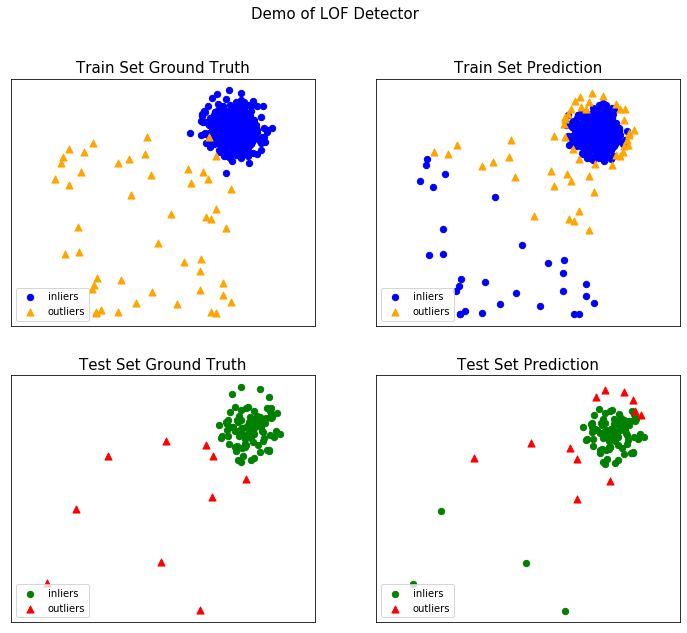

In [3]:
from __future__ import division
from __future__ import print_function

import os
import sys
from pyod.models.lof import LOF
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
import matplotlib.pyplot as plt

if __name__ == "__main__":
    contamination = 0.1  # percentage of outliers
    n_train = 500  # number of training points
    n_test = 100  # number of testing points

    # Generate sample data
    X_train, y_train, X_test, y_test = \
        generate_data(n_train=n_train,
                      n_test=n_test,
                      n_features=2,
                      contamination=contamination,
                      random_state=42)

    # train LOF detector
    clf_name = 'LOF'
    clf = LOF()
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores

    # evaluate and print the results
    print("\nOn Training Data:")
    evaluate_print(clf_name, y_train, y_train_scores)
    print("\nOn Test Data:")
    evaluate_print(clf_name, y_test, y_test_scores)

    # visualize the results
    visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True, save_figure=True)